In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
cardio_alco = pd.read_csv("data/cardio_alco.csv",delimiter=";",index_col=0)
cardio_base = pd.read_csv("data/cardio_base.csv")
covid_data = pd.read_csv("data/covid_data.csv")

In [3]:
# cardio_alco
# cardio_base
# covid_data
cardio_base["age"]=cardio_base["age"]/365
cardio_base["age"]

0        50.391781
1        55.419178
2        51.663014
3        48.282192
4        47.873973
           ...    
69995    52.712329
69996    61.920548
69997    52.235616
69998    61.454795
69999    56.273973
Name: age, Length: 70000, dtype: float64

In [4]:
cardio_base_col = cardio_base[["age","cholesterol"]]
cardio_base_col_bewlow_50 = cardio_base[cardio_base_col["age"]<50]
cardio_base_col_bewlow_50["cholesterol"].describe()


count    21409.000000
mean         1.243169
std          0.547793
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          3.000000
Name: cholesterol, dtype: float64

In [5]:
cardio_base_col_above_50 = cardio_base[cardio_base_col["age"]>=50]
cardio_base_col_above_50["cholesterol"].describe()


count    48591.000000
mean         1.421374
std          0.724364
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          3.000000
Name: cholesterol, dtype: float64

In [6]:
(1.421374-1.243169)/1.243169*100

14.334736467849499

In [7]:
age_weight = cardio_base[["age","weight"]]
# age_weight.set_index("age", inplace=True)
# plt.scatter(x=age_weight["age"],y=age_weight["weight"])
age_weight.describe()

,age,weight
count,70000.000000,70000.000000
mean,53.339358,74.205690
std,6.759594,14.395757
min,29.583562,10.000000
25%,48.394521,65.000000
50%,53.980822,72.000000
75%,58.430137,82.000000
max,64.967123,200.000000


In [8]:
# 1 women, 2 men
cardio_base[cardio_base["gender"]==2]["height"].mean()

169.94789538210054

In [9]:
men_likelihood = cardio_base[cardio_base["gender"]==2]["smoke"].mean()
women_likelihood = cardio_base[cardio_base["gender"]==1]["smoke"].mean()
men_likelihood/women_likelihood


12.257833097333833

In [10]:
# cardio_base["height"].quantile(.75)
cardio_base["height"].describe()



count    70000.000000
mean       164.359229
std          8.210126
min         55.000000
25%        159.000000
50%        165.000000
75%        170.000000
max        250.000000
Name: height, dtype: float64

In [11]:
cardio_base.corr()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke
id,1.000000,0.003457,0.003502,-0.003038,-0.001830,0.003356,-0.002529,0.006106,-0.003699
age,0.003457,1.000000,-0.022811,-0.081515,0.053684,0.020764,0.017647,0.154424,-0.047633
gender,0.003502,-0.022811,1.000000,0.499033,0.155406,0.006005,0.015254,-0.035821,0.338135
height,-0.003038,-0.081515,0.499033,1.000000,0.290968,0.005488,0.006150,-0.050226,0.187989
weight,-0.001830,0.053684,0.155406,0.290968,1.000000,0.030702,0.043710,0.141768,0.067780
ap_hi,0.003356,0.020764,0.006005,0.005488,0.030702,1.000000,0.016086,0.023778,-0.000922
ap_lo,-0.002529,0.017647,0.015254,0.006150,0.043710,0.016086,1.000000,0.024019,0.005186
cholesterol,0.006106,0.154424,-0.035821,-0.050226,0.141768,0.023778,0.024019,1.000000,0.010354
smoke,-0.003699,-0.047633,0.338135,0.187989,0.067780,-0.000922,0.005186,0.010354,1.000000


In [12]:
_2sd= cardio_base["height"].std()*2
avg = cardio_base["height"].mean()
total_people = cardio_base["height"].count()
cardio_base["height"][(cardio_base["height"]>= avg+_2sd) | (cardio_base["height"]<= avg-_2sd)].count()/total_people*100


3.3357142857142854

In [13]:
total_people_over_50 = (cardio_base["age"]>50).count()
total_people_over_50

70000

In [14]:
cardio_base["age"]>50

0         True
1         True
2         True
3        False
4        False
         ...  
69995     True
69996     True
69997     True
69998     True
69999     True
Name: age, Length: 70000, dtype: bool

In [15]:
alco_merged = pd.merge(cardio_base,cardio_alco,how="inner",on="id").set_index("id")
alco_merged


,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke,alco
id,,,,,,,,,
44,40.013699,1,159,60.0,110,70,1,0,0
45,56.580822,1,160,73.0,130,85,1,0,0
46,60.109589,2,173,82.0,140,90,3,0,0
47,55.901370,1,163,55.0,120,80,1,0,0
49,50.213699,2,175,95.0,120,80,1,0,0
...,...,...,...,...,...,...,...,...,...
99949,57.947945,1,178,69.0,130,90,1,0,0
99950,53.528767,2,155,76.0,130,90,1,0,0
99951,61.619178,2,170,72.0,120,80,1,0,0


In [16]:
alco_merged[alco_merged["age"]>50].alco.sum()

1957

In [17]:
covid_data = covid_data.set_index("date")
covid_data

,location,new_cases,new_deaths,population,aged_65_older_percent,gdp_per_capita,hospital_beds_per_thousand
date,,,,,,,
2019-12-31,Afghanistan,0,0,38928341.0,2.581,1803.987,0.5
2020-01-01,Afghanistan,0,0,38928341.0,2.581,1803.987,0.5
2020-01-02,Afghanistan,0,0,38928341.0,2.581,1803.987,0.5
2020-01-03,Afghanistan,0,0,38928341.0,2.581,1803.987,0.5
2020-01-04,Afghanistan,0,0,38928341.0,2.581,1803.987,0.5
...,...,...,...,...,...,...,...
2020-02-28,International,0,0,NaN,NaN,NaN,NaN
2020-02-29,International,0,2,NaN,NaN,NaN,NaN
2020-03-01,International,0,0,NaN,NaN,NaN,NaN


In [18]:
italy = covid_data[covid_data["location"]=="Italy"]["new_cases"].cumsum()
germany = covid_data[covid_data["location"]=="Germany"]["new_cases"].cumsum()

In [19]:
# In 2020-03-12, Italy's total death crossed 10 thousand
ig = italy-germany 
ig[ig>10000]

date
2020-03-12    10895
2020-03-13    12744
2020-03-14    14598
2020-03-15    17362
2020-03-16    19142
              ...  
2020-06-06    50853
2020-06-07    50822
2020-06-08    50805
2020-06-09    50735
2020-06-10    50700
Name: new_cases, Length: 91, dtype: int64

In [20]:
total_death = covid_data[["location","new_deaths"]].groupby("location").sum().sort_values(by="new_deaths",ascending=False)
total_death

,new_deaths
location,
World,411195
United States,112006
United Kingdom,40883
Brazil,38406
Italy,34043
...,...
Bonaire Sint Eustatius and Saba,0
Seychelles,0
Bhutan,0


In [21]:
total_population = covid_data[["location","population"]].groupby("location").sum().sort_values(by="population",ascending=False)
total_population

,population
location,
World,1.270552e+12
China,2.346098e+11
India,2.235607e+11
United States,5.395343e+10
Indonesia,4.266968e+10
...,...
Anguilla,1.140152e+06
Montserrat,4.049190e+05
Falkland Islands,2.368440e+05


In [62]:
location = pd.merge(total_death,total_population,how="inner", on="location")
location["death_rate"] = location["new_deaths"]/location["population"]*1e6
location = location.sort_values(by="death_rate", ascending=False)
location

,new_deaths,population,death_rate
location,,,
International,7,0.000000e+00,inf
San Marino,42,5.497956e+06,7.639203
Andorra,51,6.876585e+06,7.416472
Belgium,9619,1.889107e+09,5.091823
Sint Maarten (Dutch part),15,3.301914e+06,4.542820
...,...,...,...
Vietnam,0,1.586619e+10,0.000000
Fiji,0,7.440485e+07,0.000000
French Polynesia,0,2.359594e+07,0.000000


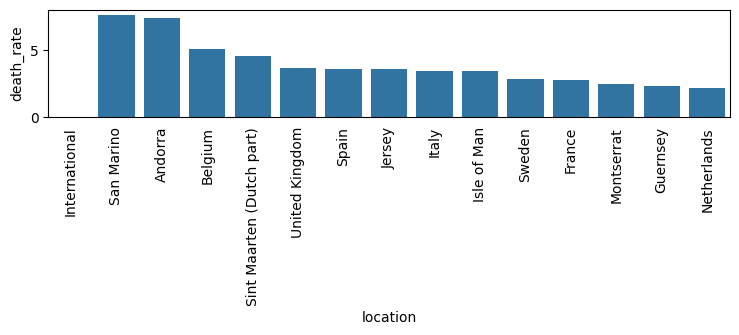

In [66]:
# Belgium had the 3rd highest death rate
sns.barplot(x=location["death_rate"].index[:15],y=location["death_rate"][:15]).tick_params(bottom=False)
plt.rcParams["figure.autolayout"] = True
plt.tick_params(axis='x', rotation=90)
plt.show()